In [ ]:
import pandas as pd
import numpy as ny
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the train data

In [ ]:
protrain = pd.read_csv('/content/processed_train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (598,600,601) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Initial Observations EDA

In [ ]:
protrain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50006 entries, 0 to 50005
Columns: 713 entries, tot_page_views to hv_replay_capable_flag_new
dtypes: float64(94), int64(619)
memory usage: 272.0 MB


In [ ]:
protrain.shape #713 columns, 50,006 records

(50006, 713)

In [ ]:
protrain.sample(5)

In [ ]:
protrain.describe() 

,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,log_in_events,internal_search_events,internal_campaign_events,find_retailer_events,buy_now_events,download_trial_events,contact_support_events,support_search_events,get_pricing_events,find_a_partner_events,form_success_events,form_abandon_events,product_view_events,cart_open_events,cart_add_events,cart_remove_events,cart_view_events,campaign_view_events,checkout_s1_events,purchase_events,survey_display_events,survey_submit_events,paid_search_events,natural_search_events,video_view_events,campaign_src_events,file_download_events,tot_google_browser_page_views,tot_mozilla_browser_page_views,tot_microsoft_browser_page_views,tot_apple_browser_page_views,tot_opera_browser_page_views,tot_other_browser_page_views,tot_internal_ref_page_views,...,geo_dunssite_others,geo_dunssite_new,sic_2_description_others,sic_2_description_new,sic_4_description_others,sic_4_description_new,gu_city_others,gu_city_new,gu_state_others,gu_state_new,gu_iso_country_name_UNITED.STATES,gu_iso_country_name_others,gu_iso_country_name_new,gu_country_region_NORAM,gu_country_region_others,gu_country_region_new,gu_country_geo_EMEA,gu_country_geo_Missing,gu_country_geo_others,gu_country_geo_new,final_vertical_gu_others,final_vertical_gu_new,gu_sic_2_description_others,gu_sic_2_description_new,gu_sic_4_description_others,gu_sic_4_description_new,gu_emp_segment_others,gu_emp_segment_new,gu_emp_segment_desc_others,gu_emp_segment_desc_new,final_vertical_dunssite_others,final_vertical_dunssite_new,idc_verticals_others,idc_verticals_new,new_segment_others,new_segment_new,hyperthreading_active_flag_others,hyperthreading_active_flag_new,hv_replay_capable_flag_others,hv_replay_capable_flag_new
count,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,50006.000000,...,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.000000,50006.0,50006.000000,50006.000000,50006.0,50006.000000,50006.000000,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0,50006.000000,50006.0
mean,73.433288,13.383994,36.071491,12.854197,2.382554,6.428089,67.805303,1.133624,0.000080,0.000020,0.030316,0.177499,0.002500,0.229292,0.025397,0.004899,0.218314,0.107247,75.070132,0.500100,0.368996,0.003420,0.992141,1.044275,73.213234,81.427709,0.000060,0.000060,0.035536,11.126945,1.303764,0.358257,0.831300,39.987861,21.208255,19.366656,4.497580,0.077091,0.340039,38.984222,...,0.039415,0.0,0.267888,0.0,0.267888,0.0,0.266968,0.0,0.251090,0.0,0.105707,0.162580,0.0,0.118886,0.149402,0.0,0.101148,0.731712,0.038875,0.0,0.259989,0.0,0.268028,0.0,0.268028,0.0,0.268488,0.0,0.268488,0.0,0.267888,0.0,0.267888,0.0,0.217974,0.0,0.027937,0.0,0.027937,0.0
std,760.254988,134.119192,377.833496,162.130164,28.586230,82.373655,678.805295,20.080458,0.008943,0.004472,0.225468,0.802761,0.055258,1.667076,0.224209,0.102542,0.678312,0.490727,784.151478,2.819247,2.556437,0.213082,20.243465,8.597505,757.942959,819.949048,0.007745,0.009999,0.449151,124.951282,43.054739,2.804145,20.120543,409.205579,273.639829,255.969396,80.381213,5.145101,8.670267,399.594445,...,0.194583,0.0,0.442863,0.0,0.442863,0.0,0.442380,0.0,0.433644,0.0,0.307466,0.368986,0.0,0.323657,0.356488,0.0,0.301527,0.443073,0.193300,0.0,0.438633,0.0,0.442937,0.0,0.442937,0.0,0.443177,0.0,0.443177,0.0,0.442863,

In [ ]:
print (protrain.isnull().values.any())

Target Variable Exploration Data Analysis

In [ ]:
protrain.target.value_counts().plot.bar() #Shows distribution of values in the Target column
plt.show() #plots a bar chart

#Add to Report

Numerical Data Distribution

In [ ]:
list(set(protrain.dtypes.tolist()))


[dtype('int64'), dtype('float64')]

In [ ]:
protrain_num = protrain.select_dtypes(include = ['float64', 'int64'])
protrain_num.head()

Correlation Matrix

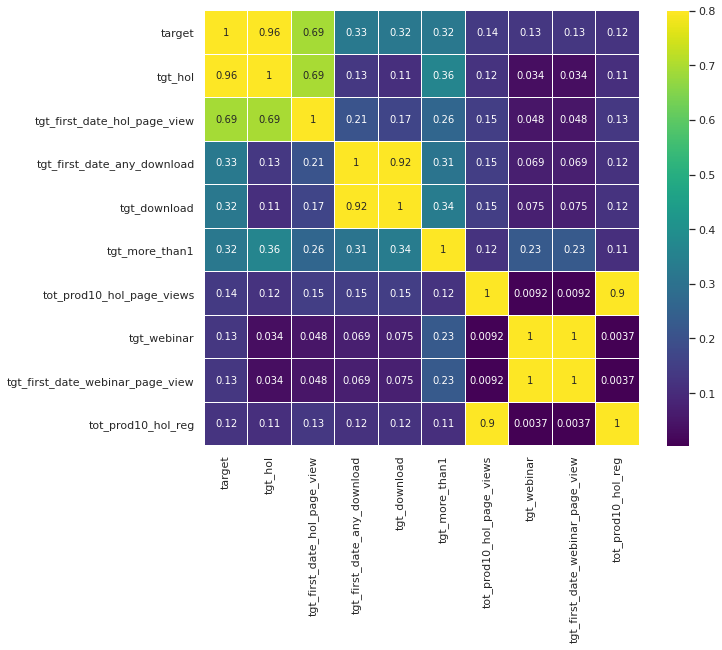

In [ ]:
# Correlation matrix of top 10 most correlated variables
correlation = protrain.select_dtypes(include=ny.number).corr()
cor_target = correlation['target']
## Heatmap of feature with High correlations
plt.figure(figsize=(10,8))
k = 10
top10 = correlation.nlargest(k, 'target')['target'].index
cm = ny.corrcoef(protrain[top10].to_numpy().T)
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white", \
            xticklabels=top10.values, yticklabels=top10.values)
plt.show()

#Add to Report

In [ ]:
#protrain.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8) #Way too many variables to plot

In [ ]:
print(top10)

Index(['target', 'tgt_hol', 'tgt_first_date_hol_page_view',
       'tgt_first_date_any_download', 'tgt_download', 'tgt_more_than1',
       'tot_prod10_hol_page_views', 'tgt_webinar',
       'tgt_first_date_webinar_page_view', 'tot_prod10_hol_reg'],
      dtype='object')


Data Normalization

In [ ]:
from scipy.stats import norm, skew

In [ ]:
# Check the skew of all numerical features
#skewed_feats = protrain[target].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("\nSkewness the in numerical features: \n")
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#skewness.head(15)

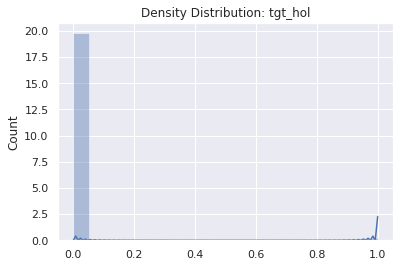

In [ ]:
#Skewness for tgt hol
sns.distplot(protrain['tgt_hol'], kde=True, bins=20)
plt.title("Density Distribution: tgt_hol")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

#Add to Report

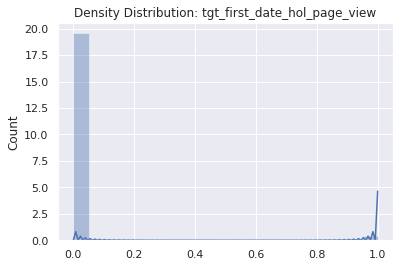

In [ ]:
#Skewness for tgt first date hol page view
sns.distplot(protrain['tgt_first_date_hol_page_view'], kde=True, bins=20)
plt.title("Density Distribution: tgt_first_date_hol_page_view")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

#Add to Report
